In [1]:
# system information
import os
from glob import glob

# computing
import numpy as np
import pandas as pd
from datetime import datetime
import scipy as sp
import scipy.optimize as op
from scipy.signal import find_peaks

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
%matplotlib inline

# ROOT files handling
import uproot as ur
import ROOT

Welcome to JupyROOT 6.26/06


In [2]:
# Define the Gaussian function
def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

# define ticks
def set_ticks(ax, xMaj, yMaj):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.minorticks_on()
    ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=14)
    ax.tick_params(which='minor', width=1.0, length=4, direction='in', labelsize=14)
    ax.yaxis.get_offset_text().set_fontsize(14)
    ax.xaxis.get_offset_text().set_fontsize(14)


In [3]:
import pandas as pd
df = pd.read_csv('LCM_0cd93db0_20220207_031713.csv', sep=',')

connections = pd.read_csv('connections.csv', sep=',')
df['ACL'] = connections['ACL']
df['LCM'] = connections['LCM']

df_valid = df[df['Gain']>0]
df_ped = df[df['Gain']<0]
df_null = df[df['Gain']==0]

In [4]:
df

,Channel,Peaks,Gain,Error_g,Offset,Error_o,ACL,LCM
0,0,0,0.00,0.00,0.00,0.00,None,None
1,1,0,0.00,0.00,0.00,0.00,None,None
2,2,0,0.00,0.00,0.00,0.00,None,None
3,3,0,0.00,0.00,0.00,0.00,None,None
4,4,9,1607.17,2.09,15722.84,6.99,ACL-101,LCM-113
...,...,...,...,...,...,...,...,...
59,59,1,-1000.00,0.00,15519.17,2.41,ACL-108,LCM-110
60,60,1,-1000.00,0.00,15777.97,1.82,ACL-108,LCM-111
61,61,1,-1000.00,0.00,15829.00,2.63,ACL-108,LCM-111
62,62,1,-1000.00,0.00,15431.21,2.73,ACL-108,LCM-112


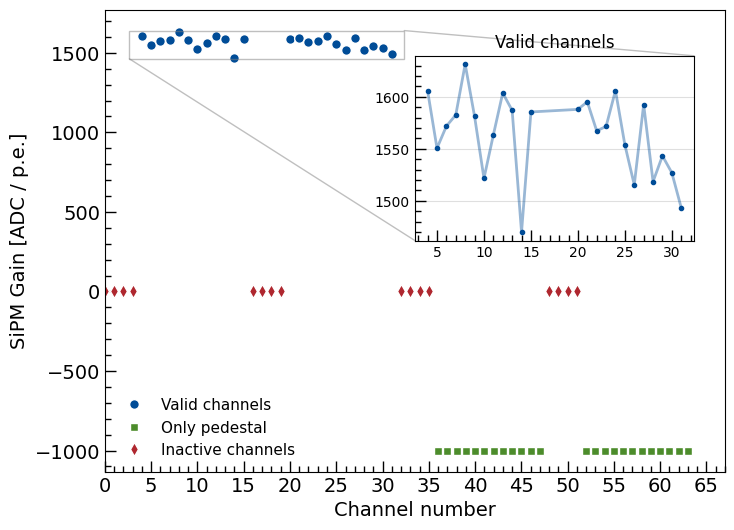

In [59]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot(df_valid['Channel'], df_valid['Gain'], marker='o', mec='white', markersize=7,
                color='#004C97', linestyle='none', label='Valid channels')

ax.plot(df_ped['Channel'], df_ped['Gain'], marker='s', mec='white', markersize=6,
                color='#4C8C2B', linestyle='none', label='Only pedestal')

ax.plot(df_null['Channel'], df_null['Gain'], marker='d', mec='white', markersize=7,
                color='#AF272F', linestyle='none', label='Inactive channels')

# labels 
ax.set_ylabel('SiPM Gain [ADC / p.e.]', fontsize = 14)
ax.set_xlabel('Channel number', fontsize = 14)

# ticks
set_ticks(ax, 5,500)
ax.set_xlim(0,67)

# inset 
hins = ax.inset_axes([0.5, 0.5, 0.45, 0.4], transform=ax.transAxes)
hins.set_title('Valid channels',fontsize=12)
hins.grid(axis='y',ls='-',alpha=0.25, color='gray')

hins.plot(df_valid['Channel'], df_valid['Gain'],color='#004C97', ls='-', alpha=0.4, lw=2,)
hins.plot(df_valid['Channel'], df_valid['Gain'], lw=0, marker='o',  alpha=1, markersize=3, color='#004C97')

hins.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=10)
hins.tick_params(which='minor', width=1.0, length=4, direction='in', labelsize=10)
hins.minorticks_on()

ax.indicate_inset_zoom(hins,edgecolor="gray")
ax.legend(loc = 'best', prop = {'size': 11}, ncol = 1, frameon = False)

#fig.savefig("gains.pdf",dpi = 200)

plt.show()

In [41]:
connections = pd.read_csv('connections.csv', sep=',')
df['ACL'] = connections['ACL']
df['LCM'] = connections['LCM']
df

,Channel,Peaks,Gain,Error_g,Offset,Error_o,ACL,LCM
0,0,0,0.00,0.00,0.00,0.00,None,None
1,1,0,0.00,0.00,0.00,0.00,None,None
2,2,0,0.00,0.00,0.00,0.00,None,None
3,3,0,0.00,0.00,0.00,0.00,None,None
4,4,9,1605.67,2.04,15723.94,6.74,ACL-101,LCM-113
...,...,...,...,...,...,...,...,...
60,60,1,-1000.00,0.00,15777.88,1.82,ACL-108,LCM-111
61,61,1,-1000.00,0.00,15829.75,2.43,ACL-108,LCM-111
62,62,1,-1000.00,0.00,15428.93,2.75,ACL-108,LCM-112
63,63,1,-1000.00,0.00,15386.91,1.85,ACL-108,LCM-112


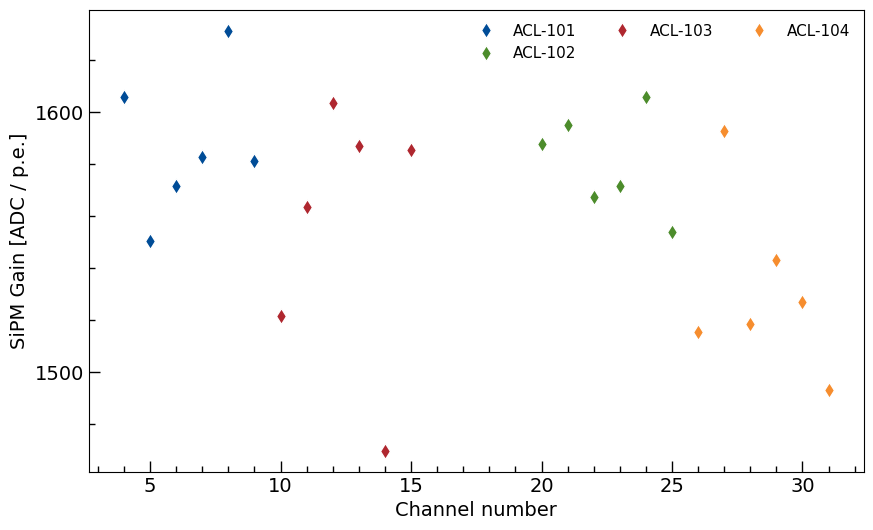

In [97]:
fig, ax = plt.subplots(figsize=(10,6))

from cycler import cycler 
# Set the default color cycle
colors_1 = ['#004C97', '#4C8C2B', '#AF272F', '#F68D2E', '#FED141','#9467BD', '#E377C2', '#FC5A50','#04D8B2' ]
colors_2 = ['#004C97', '#4C8C2B', '#AF272F', '#F68D2E', '#FED141','#80A6CB', '#A6C695','#D79397','#FBC696']

custom_cycler = (cycler(color=colors))
ax.set_prop_cycle(custom_cycler)

for key, grp in df_valid.groupby(['ACL']):
    ax.plot(grp['Channel'], grp['Gain'], label=key, marker='d', mec='white', markersize=8,
             linestyle='none')


# labels 
ax.set_ylabel('SiPM Gain [ADC / p.e.]', fontsize = 14)
ax.set_xlabel('Channel number', fontsize = 14)
# ticks
set_ticks(ax, 5,100)

ax.legend(loc = 'best', prop = {'size': 11}, ncol = 3, frameon = False)

plt.show()

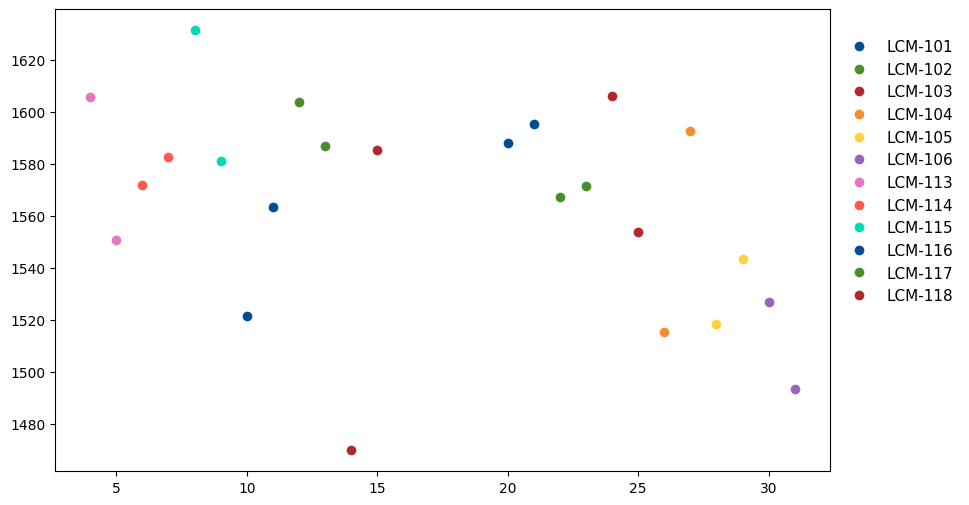

In [93]:
fig, ax = plt.subplots(figsize=(10,6))

from cycler import cycler 
# Set the default color cycle
colors_1 = ['#004C97', '#4C8C2B', '#AF272F', '#F68D2E', '#FED141','#9467BD', '#E377C2', '#FC5A50','#04D8B2' ]
colors_2 = ['#004C97', '#4C8C2B', '#AF272F', '#F68D2E', '#FED141','#80A6CB', '#A6C695','#D79397','#FBC696']

custom_cycler = (cycler(color=colors_1))
ax.set_prop_cycle(custom_cycler)

for key, grp in df_valid.groupby(['LCM']):
    ax.plot(grp['Channel'], grp['Gain'], label=key, marker='o', mec='white', markersize=8,
             linestyle='none')


ax.legend(loc = (1.01,0.35), prop = {'size': 11}, ncol = 1, frameon = False)
plt.show()

In [99]:
len(df_valid.groupby(['ACL']))

4

ValueError: x and y must have same first dimension, but have shapes (6,) and (2,)

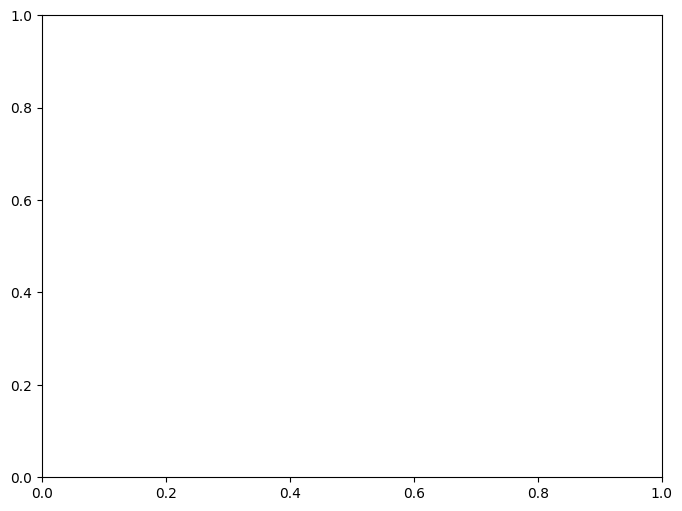

In [8]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot(arcl['ACL101'], gains['ACL101'], marker='o', mec='white', markersize=7,
                color='#004C97', linestyle='none', label='ACL101')
ax.plot(arcl['ACL101'], gains['ACL101'], color='#004C97', ls='-', alpha=0.4, lw=2)


ax.plot(arcl['ACL103'], gains['ACL103'], marker='s', mec='white', markersize=7,
                color='#4C8C2B', linestyle='none', label='ACL103')
ax.plot(arcl['ACL103'], gains['ACL103'], color='#4C8C2B', ls='-', alpha=0.4, lw=2)

ax.plot(arcl['ACL102'], gains['ACL102'], marker='d', mec='white', markersize=8,
                color='#AF272F', linestyle='none', label='ACL102')
ax.plot(arcl['ACL102'], gains['ACL102'], color='#AF272F', ls='-', alpha=0.4, lw=2,)

ax.plot(arcl['ACL104'], gains['ACL104'], marker='^', mec='white', markersize=8,
                color='#F68D2E', linestyle='none', label='ACL104')
ax.plot(arcl['ACL104'], gains['ACL104'], color='#F68D2E', ls='-', alpha=0.4, lw=2,)

ax.legend(loc = 'best', prop = {'size': 11}, ncol = 2, frameon = False)


# labels 
ax.set_ylabel('SiPM Gain [ADC / p.e.]', fontsize = 14)
ax.set_xlabel('Channel number', fontsize = 14)

# ticks
set_ticks(ax, 5,20)

#fig.savefig("active_ch_gains.pdf",dpi = 200)
plt.show()

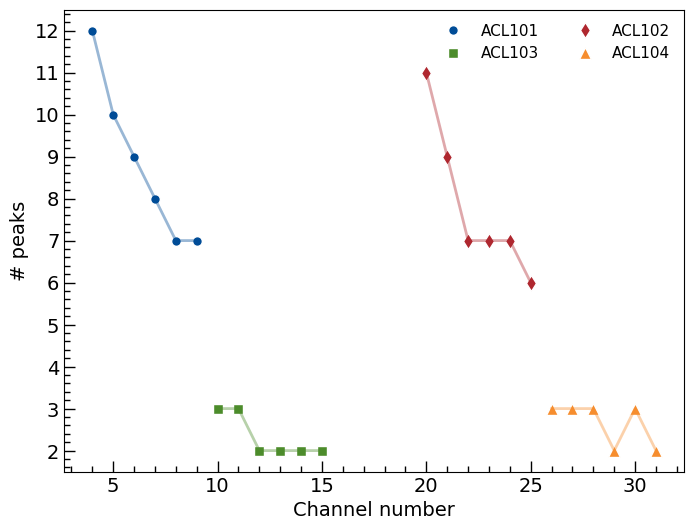

In [130]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot(arcl['ACL101'], peaks['ACL101'], marker='o', mec='white', markersize=7,
                color='#004C97', linestyle='none', label='ACL101')
ax.plot(arcl['ACL101'], peaks['ACL101'], color='#004C97', ls='-', alpha=0.4, lw=2)


ax.plot(arcl['ACL103'], peaks['ACL103'], marker='s', mec='white', markersize=7,
                color='#4C8C2B', linestyle='none', label='ACL103')
ax.plot(arcl['ACL103'], peaks['ACL103'], color='#4C8C2B', ls='-', alpha=0.4, lw=2)

ax.plot(arcl['ACL102'], peaks['ACL102'], marker='d', mec='white', markersize=8,
                color='#AF272F', linestyle='none', label='ACL102')
ax.plot(arcl['ACL102'], peaks['ACL102'], color='#AF272F', ls='-', alpha=0.4, lw=2,)

ax.plot(arcl['ACL104'], peaks['ACL104'], marker='^', mec='white', markersize=8,
                color='#F68D2E', linestyle='none', label='ACL104')
ax.plot(arcl['ACL104'], peaks['ACL104'], color='#F68D2E', ls='-', alpha=0.4, lw=2,)

ax.legend(loc = 'best', prop = {'size': 11}, ncol = 2, frameon = False)


# labels 
ax.set_ylabel('# peaks', fontsize = 14)
ax.set_xlabel('Channel number', fontsize = 14)

# ticks
set_ticks(ax, 5,1)

fig.savefig("active_ch_peaks.pdf",dpi = 200)

plt.show()

In [101]:
m_styles = mpl.markers.MarkerStyle.markers

In [102]:
m_styles

{'.': 'point',
 ',': 'pixel',
 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',
 '8': 'octagon',
 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',
 '|': 'vline',
 '_': 'hline',
 'P': 'plus_filled',
 'X': 'x_filled',
 0: 'tickleft',
 1: 'tickright',
 2: 'tickup',
 3: 'tickdown',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 'None': 'nothing',
 None: 'nothing',
 ' ': 'nothing',
 '': 'nothing'}